Importamos las librerias

In [21]:
import tensorflow as tf
import numpy as np

Metemos nuestros datos en un array

In [22]:
def f(a,b,x):
  return a+b*x
x=[1,2,3,4,5,6,7,8,9,10]
y=[]

for i in range(10):
  y.append(f(1,10, x[i]))

In [23]:
print(x,y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [11, 21, 31, 41, 51, 61, 71, 81, 91, 101]


In [24]:
valorx = np.array(x, dtype=float)
valory = np.array(y, dtype=float)

Hacemos el modelo

In [25]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

#oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
#oculta2 = tf.keras.layers.Dense(units=3)
#salida = tf.keras.layers.Dense(units=1)

#modelo = tf.keras.Sequential([oculta1, oculta2, salida])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss= "mean_squared_error"
)

Entrenando el modelo

In [27]:
print("Entrenando")
historial = modelo.fit(valorx,valory,epochs=1000,verbose=False)
print("Entrenado")

Entrenando
Entrenado


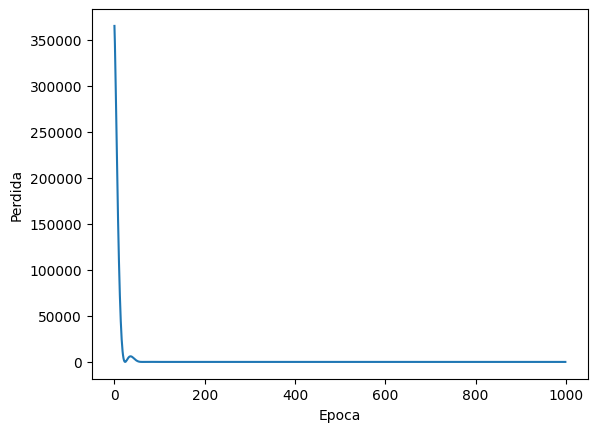

In [18]:
import matplotlib.pyplot as plt

plt.xlabel("Epoca")
plt.ylabel("Perdida")
plt.plot(historial.history["loss"])

Predicciones

In [28]:
resultado = modelo.predict( np.array([10, 6],dtype=float))
print(resultado)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[99.828804]
 [61.27459 ]]


Pesos

In [33]:
modelo.summary()
print(capa.get_weights())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6 (28.00 B)

[array([[9.638555]], dtype=float32), array([3.44326], dtype=float32)]
